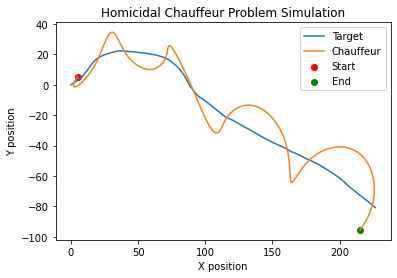

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_homicidal_chauffeur(target_strategy, chauffeur_strategy, max_time=100, dt=0.1):
    # Initial conditions
    target_pos = np.array([0, 0])  # Target's initial position
    chauffeur_pos = np.array([5, 5])  # Chauffeur's initial position
    target_vel = np.array([1, 1])  # Target's initial velocity
    chauffeur_vel = np.array([0, 0])  # Chauffeur's initial velocity
    
    target_vel = target_vel.astype(float)
    target_pos = target_pos.astype(float)

    chauffeur_vel = chauffeur_vel.astype(float)
    chauffeur_pos = chauffeur_pos.astype(float)

    
    # Simulation variables
    time = 0
    target_positions = [target_pos.copy()]
    chauffeur_positions = [chauffeur_pos.copy()]
    
    while time <= max_time:
        # Update target's strategy
        target_input = target_strategy(target_pos, chauffeur_pos, target_vel, chauffeur_vel)
        
        # Update chauffeur's strategy
        chauffeur_input = chauffeur_strategy(chauffeur_pos, target_pos, chauffeur_vel)
        
        # Update positions and velocities using kinematic equations
        target_vel += target_input * dt
        target_pos += target_vel * dt
        
        chauffeur_vel += chauffeur_input * dt
        chauffeur_pos += chauffeur_vel * dt
        
        # Append positions to the trajectory lists
        target_positions.append(target_pos.copy())
        chauffeur_positions.append(chauffeur_pos.copy())
        
        if np.linalg.norm(target_pos - chauffeur_pos) <= 0.2:
            print("Collision occurred!")
            print(time)
            break
            
        time += dt
    
    # Plotting the trajectories
    target_positions = np.array(target_positions)
    chauffeur_positions = np.array(chauffeur_positions)
    
    plt.plot(target_positions[:, 0], target_positions[:, 1], label='Target')
    plt.plot(chauffeur_positions[:, 0], chauffeur_positions[:, 1], label='Chauffeur')
    plt.scatter(chauffeur_positions[0, 0], chauffeur_positions[0, 1], color='red', label='Start')
    plt.scatter(chauffeur_positions[-1, 0], chauffeur_positions[-1, 1], color='green', label='End')
    plt.xlabel('X position')
    plt.ylabel('Y position')
    plt.title('Homicidal Chauffeur Problem Simulation')
    plt.legend()
    plt.show()

# Example strategies
def random_target_strategy(target_pos, chauffeur_pos, target_vel, chauffeur_vel):
    return np.random.uniform(low=-1, high=1, size=2)

def constant_speed_chauffeur_strategy(chauffeur_pos, target_pos, chauffeur_vel):
    desired_vel = target_pos - chauffeur_pos
    return desired_vel / np.linalg.norm(desired_vel)

# Run the simulation
simulate_homicidal_chauffeur(random_target_strategy, constant_speed_chauffeur_strategy)


In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.8/432.8 kB 969.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 6.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [14]:
!pip install casadi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 MB 8.8 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
